<a href="https://colab.research.google.com/github/LintangAprillya/PCVK_SMT5/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAPORAN PCVK - MODUL 5 : Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking**





---


Nama  : Lintang Aprillya Sari

Kelas : 3C

Absen : 13

NIM   : 2241720231


---



## **TUGAS PRAKTIKUM**

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


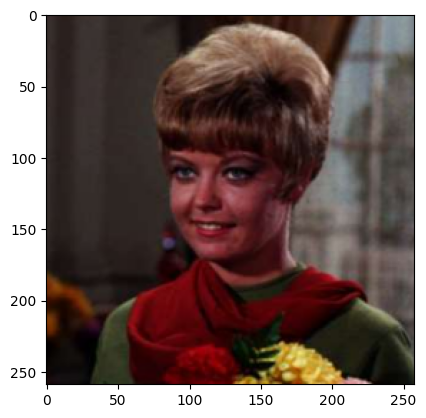

In [2]:

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img_f = cv.imread('/content/drive/MyDrive/PCVK/tiff.png')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)


### **1. Membuat Gamma Correction**

 Gamma Correction pada Citra 
----------------------------------
Masukkan Nilai Gamma: 3


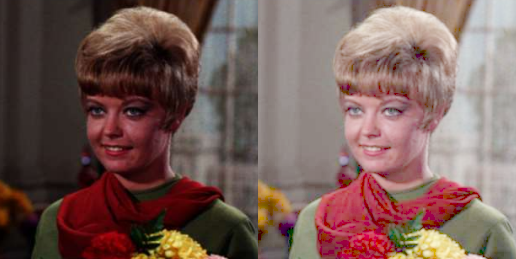

In [3]:

print(' Gamma Correction pada Citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan Nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

### **2. Membuat Simulasi Image Depth**

Image Depth
----------------------


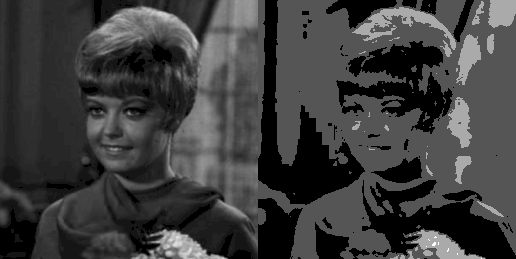

In [4]:
print('Image Depth')
print('----------------------')

bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/tiff.png', cv.IMREAD_GRAYSCALE)
img_depth = np.zeros(original.shape,original.dtype)

# melakukan akses setiap piksel pada grayscale
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    img_depth[y,x] = np.clip(round(original[y,x] / level)*level,0,255)

final_frame = cv.hconcat((original,img_depth))
cv2_imshow(final_frame)

### **3. Average Denoising**

#### **No 1 - Dengan Jumlah Citra Average 5**

Nilai PSNR (db):  28.11827244036378  dB


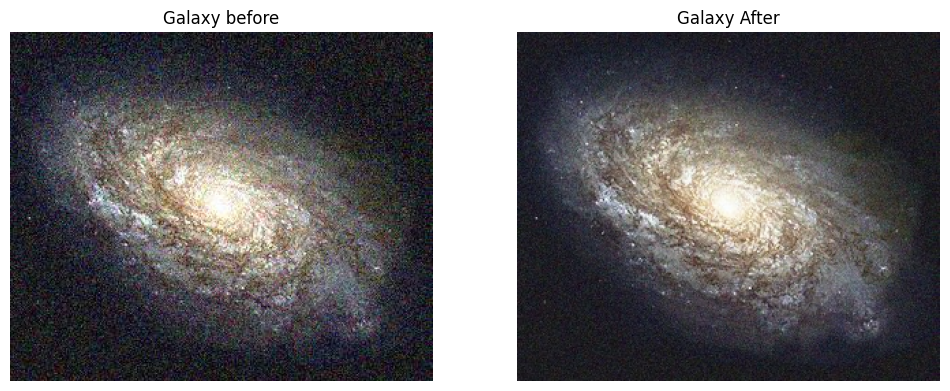

In [8]:
import glob
import cv2
import numpy as np
from math import sqrt, log10
import matplotlib.pyplot as plt

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Reading original image
original_img = cv2.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Resizing original image to ensure it matches the noisy image dimensions
original_img = cv2.resize(original_img, (310, 256))  # Resize to match noisy images

# Reading all images from the folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv2.imread(img)
    n = cv2.resize(n, (310, 256))  # Resize noisy image to consistent dimensions
    cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape, dtype=np.float64)
jmlGambar = 5  # Set the number of images to average
for i in range(jmlGambar):
    denoised_img += cv_img[i]

# Normalize the denoised image by averaging
denoised_img = np.uint8(denoised_img / jmlGambar)

# Calculate PSNR
psnr = PSNR(original_img, denoised_img)

print('Nilai PSNR (db): ', psnr, ' dB')

# Display images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()


#### **No 2 - Dengan Jumlah Citra Average 10**

Nilai PSNR (db): 28.1223262902446 dB


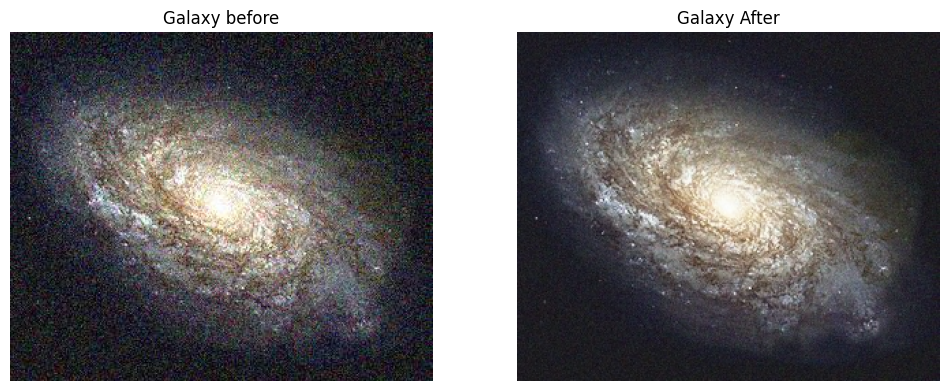

In [10]:
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Read the original image
original_img = cv2.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Resize the original image to match the size of the noisy images
original_img = cv2.resize(original_img, (310, 256))  # Resize to match noisy images

# Read all noisy images from the folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv2.imread(img)
    n = cv2.resize(n, (310, 256))  # Ensure all noisy images have consistent dimensions
    cv_img.append(n)

# Initialize denoised image
denoised_img = np.zeros(cv_img[0].shape, dtype=np.float64)

# Set the number of images to average
jmlGambar = 10
for i in range(jmlGambar):
    denoised_img += cv_img[i]

# Normalize the denoised image by averaging
denoised_img = np.uint8(denoised_img / jmlGambar)

# Calculate PSNR
psnr = PSNR(original_img, denoised_img)

# Output the PSNR value
print('Nilai PSNR (db):', psnr, 'dB')

# Display images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

#### **No 3 - Dengan Jumlah Citra Average 20**

Nilai PSNR (db): 28.12404618400016 dB


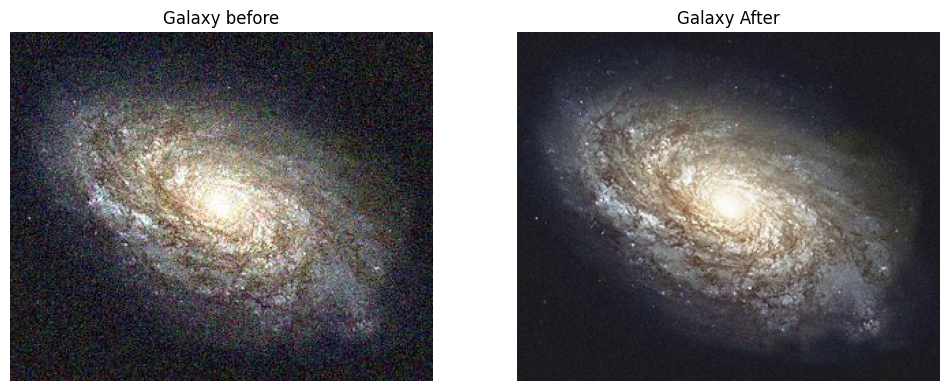

In [12]:
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Read the original image
original_img = cv2.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Resize the original image to match the size of the noisy images
original_img = cv2.resize(original_img, (310, 256))  # Resize to match noisy images

# Read all noisy images from the folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv2.imread(img)
    n = cv2.resize(n, (310, 256))  # Ensure all noisy images have consistent dimensions
    cv_img.append(n)

# Initialize denoised image
denoised_img = np.zeros(cv_img[0].shape, dtype=np.float64)

# Set the number of images to average
jmlGambar = 20
for i in range(jmlGambar):
    denoised_img += cv_img[i]

# Normalize the denoised image by averaging
denoised_img = np.uint8(denoised_img / jmlGambar)

# Calculate PSNR
psnr = PSNR(original_img, denoised_img)

# Output the PSNR value
print('Nilai PSNR (db):', psnr, 'dB')

# Display images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

#### **No 4 - Dengan Jumlah Citra Average 40**

Nilai PSNR (db): 28.106900859388332 dB


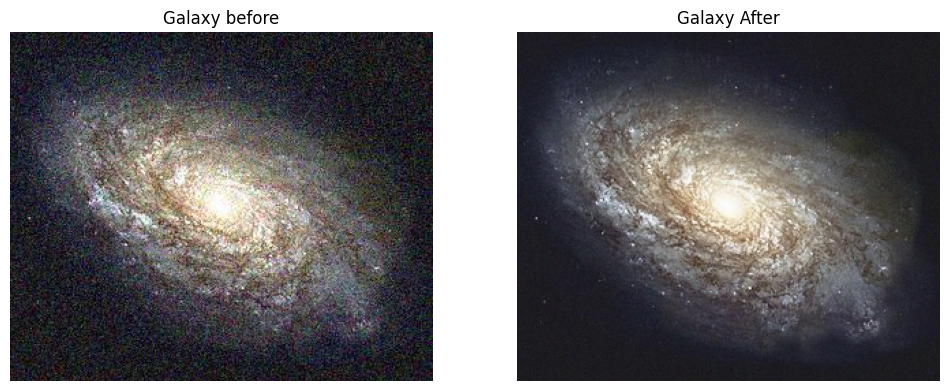

In [14]:
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Read the original image
original_img = cv2.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Resize the original image to match the size of the noisy images
original_img = cv2.resize(original_img, (310, 256))  # Resize to match noisy images

# Read all noisy images from the folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv2.imread(img)
    n = cv2.resize(n, (310, 256))  # Ensure all noisy images have consistent dimensions
    cv_img.append(n)

# Initialize denoised image
denoised_img = np.zeros(cv_img[0].shape, dtype=np.float64)

# Set the number of images to average
jmlGambar = 40
for i in range(jmlGambar):
    denoised_img += cv_img[i]

# Normalize the denoised image by averaging
denoised_img = np.uint8(denoised_img / jmlGambar)

# Calculate PSNR
psnr = PSNR(original_img, denoised_img)

# Output the PSNR value
print('Nilai PSNR (db):', psnr, 'dB')

# Display images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

#### **No 5 - Dengan Jumlah Citra Average 80**

Nilai PSNR (db): 28.091124387178972 dB


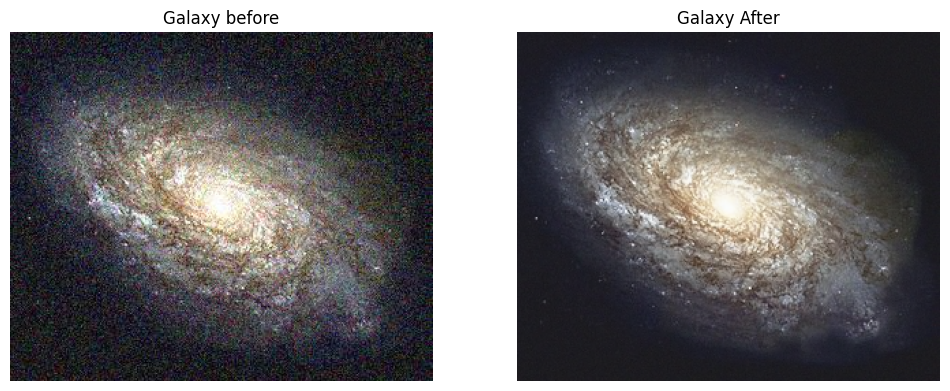

In [16]:
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Read the original image
original_img = cv2.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Resize the original image to match the noisy images
original_img = cv2.resize(original_img, (310, 256))  # Resize to match noisy images

# Read all noisy images from the folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv2.imread(img)
    n = cv2.resize(n, (310, 256))  # Resize noisy images for consistency
    cv_img.append(n)

# Initialize denoised image
denoised_img = np.zeros(cv_img[0].shape, dtype=np.float64)

# Set the number of images to average
jmlGambar = 80
for i in range(jmlGambar):
    denoised_img += cv_img[i]

# Normalize the denoised image by averaging
denoised_img = np.uint8(denoised_img / jmlGambar)

# Calculate PSNR
psnr = PSNR(original_img, denoised_img)

# Output the PSNR value
print('Nilai PSNR (db):', psnr, 'dB')

# Display images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

#### **No 6 - Dengan Jumlah Citra Average 100**

Nilai PSNR (db): 28.081623570504902 dB


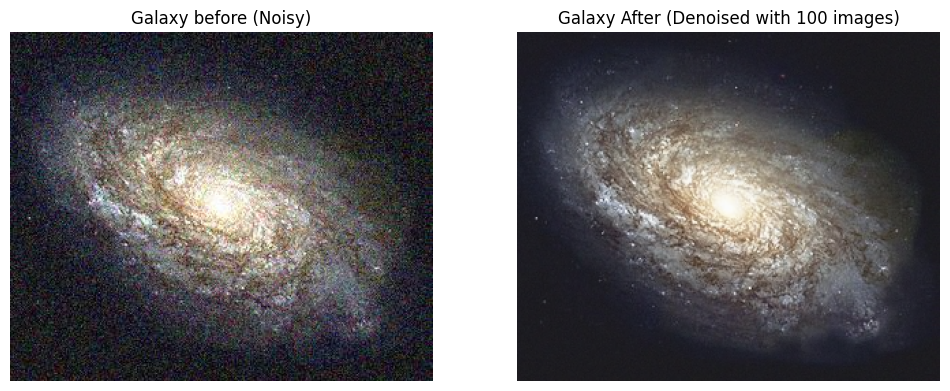

In [18]:
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Read the original image
original_img = cv2.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Resize the original image to match the noisy images' size
original_img = cv2.resize(original_img, (310, 256))  # Resize to match noisy images

# Read all noisy images from the folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv2.imread(img)
    n = cv2.resize(n, (310, 256))  # Resize noisy images for consistency
    cv_img.append(n)

# Initialize denoised image
denoised_img = np.zeros(cv_img[0].shape, dtype=np.float64)

# Set the number of images to average (100 in this case)
jmlGambar = 100
for i in range(jmlGambar):
    denoised_img += cv_img[i]

# Normalize the denoised image by averaging
denoised_img = np.uint8(denoised_img / jmlGambar)

# Calculate PSNR between the original and denoised image
psnr = PSNR(original_img, denoised_img)

# Output the PSNR value
print('Nilai PSNR (db):', psnr, 'dB')

# Display original noisy image and denoised result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))  # Display the first noisy image
plt.title('Galaxy before (Noisy)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))  # Display the denoised image
plt.title('Galaxy After (Denoised with 100 images)')
plt.axis('off')

plt.show()

### **4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:**

#### **OPERATOR (Komplemen)**

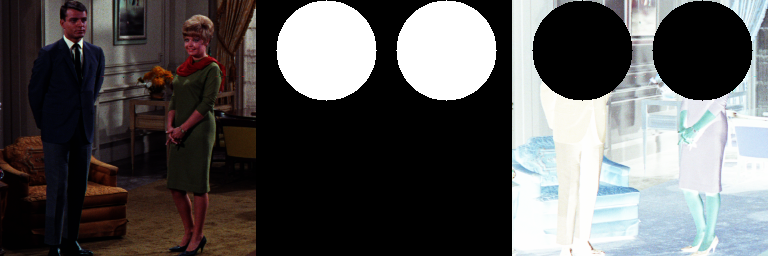

In [19]:
from google.colab.patches import cv2_imshow
# menggunakan operator NOT (komplemen)
img = cv2.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv2.circle(mask, (70,50), 50, (255,255,255), -1)

result = img & mask

mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv2.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask2

masked = ~img & ~mask

final_frame = cv2.hconcat((img, mask, masked))
cv2_imshow(final_frame)

#### **OR (Atau)**

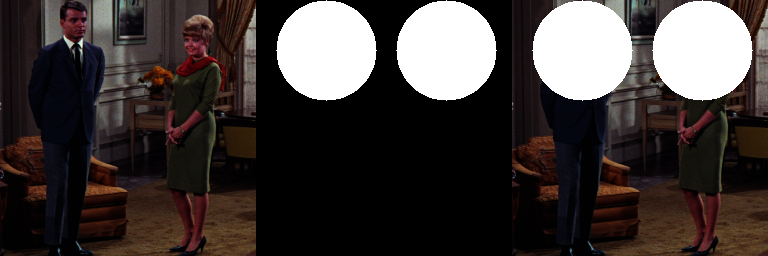

In [20]:
# menggunakan operator OR(atau)
mask = np.zeros(img.shape,img.dtype)
mask = cv2.circle(mask, (70,50), 50, (255,255,255), -1)

result = img & mask

mask2 = np.zeros(img.shape, img.dtype)
mask2 = cv2.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask2

masked = img | mask

final_frame = cv2.hconcat((img,mask,masked))
cv2_imshow(final_frame)

#### **AND (Atau)**

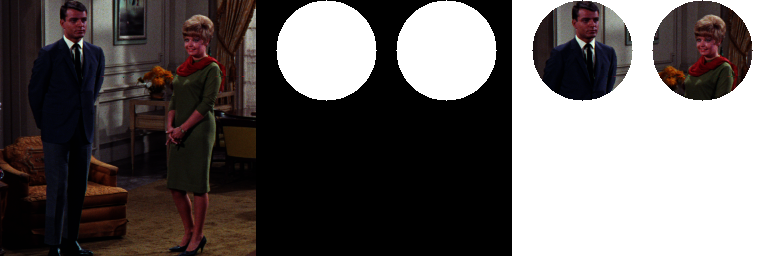

In [21]:
# menggunakan operator AND(dan)
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv2.circle(mask, (70,50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv2.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255

final_frame = cv2.hconcat((img,mask,result))
cv2_imshow(final_frame)

#### **NAND (Not And)**

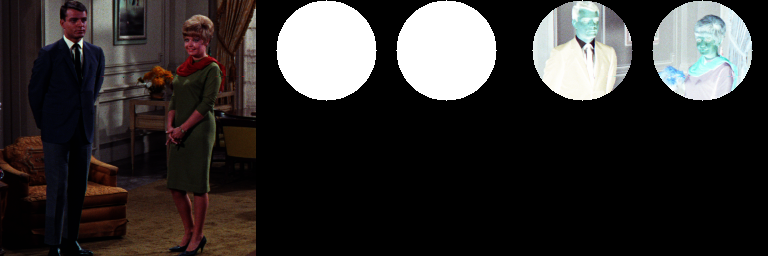

In [22]:
# menggunakan operator NAND(Not And)
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv2.circle(mask, (70,50), 50, (255,255,255), -1)
mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv2.circle(mask, (190,50), 50, (255,255,255), -1)

masked = ~img & mask

final_frame = cv2.hconcat((img, mask, masked))
cv2_imshow(final_frame)

#### **XOR (Exclusive Or)**

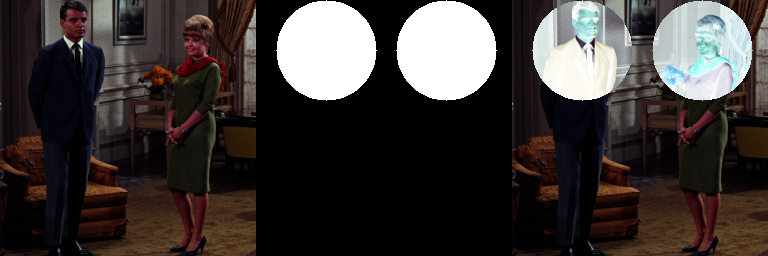

In [23]:
# menggunakan operator XOR(Exlusive Or)
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv2.circle(mask, (70,50), 50, (255,255,255), -1)
mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv2.circle(mask, (190,50), 50, (255,255,255), -1)

masked = cv2.bitwise_xor(img, mask)

final_frame = cv2.hconcat((img, mask, masked))
cv2_imshow(final_frame)
